In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Dropout, Flatten,BatchNormalization
from tensorflow.keras import optimizers
from keras.layers.advanced_activations import LeakyReLU
from keras_preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import Adam
from matplotlib.pyplot import imread, imshow, subplots, show
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

In [2]:
IMG_WIDTH=48
IMG_HEIGHT=48

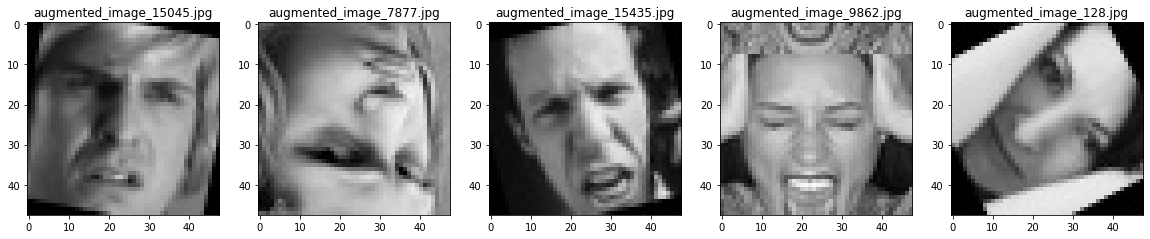

In [3]:
plt.figure(figsize=(20,20))
train_folder=r'C:\Users\ASUS\Desktop\Aumented_Images\train\angry'
for i in range(5):
    file = random.choice(os.listdir(train_folder))
    image_path= os.path.join(train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

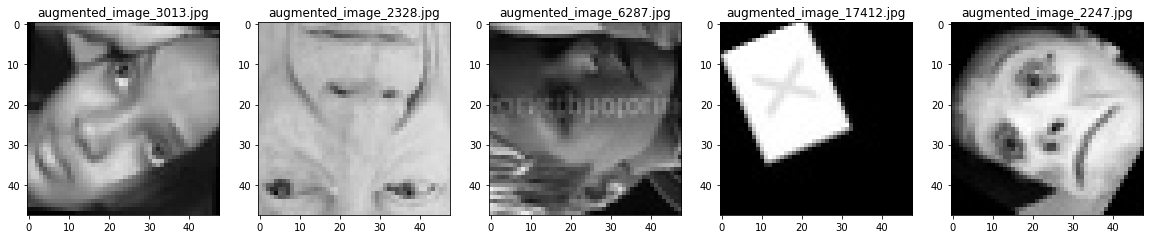

In [4]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\ASUS\Desktop\Aumented_Images\test\sad'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, 0)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH,),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name

In [6]:
# train_img_data, train_class_name =create_dataset(r'C:\Users\ASUS\Desktop\Aumented_Images\train')
test_img_data, test_class_name =create_dataset(r'C:\Users\ASUS\Desktop\Aumented_Images\test')
# validate_img_data, validate_class_name =create_dataset(r'C:\Users\ASUS\Desktop\Aumented_Images\validate')

In [7]:
# print(len(train_img_data))
# print(train_img_data[0].shape)
# print(len(test_img_data))
# print(test_img_data[0].shape)
# print(len(validate_img_data))
# print(validate_img_data[0].shape)

In [8]:
# train_img_data=np.array(train_img_data, np.float32)
# train_img_data=train_img_data.reshape(-1, 48, 48, 1)
test_img_data=np.array(test_img_data, np.float32)
test_img_data=test_img_data.reshape(-1, 48, 48, 1)
# validate_img_data=np.array(validate_img_data, np.float32)
# validate_img_data=validate_img_data.reshape(-1, 48, 48, 1)
# print(train_img_data.shape)
print(test_img_data.shape)
# print(validate_img_data.shape)

(18547, 48, 48, 1)


In [9]:
# train_dict={k: v for v, k in enumerate(np.unique(train_class_name))}
test_dict={k: v for v, k in enumerate(np.unique(test_class_name))}
# validate_dict={k: v for v, k in enumerate(np.unique(validate_class_name))}
# key_list = list(train_dict.keys())
# val_list = list(train_dict.values())
# print(train_dict)
print(test_dict)
# print(validate_dict)

{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [10]:
# train_target_val=  [train_dict[train_class_name[i]] for i in range(len(train_class_name))]
test_target_val=  [test_dict[test_class_name[i]] for i in range(len(test_class_name))]
# validate_target_val=  [validate_dict[validate_class_name[i]] for i in range(len(validate_class_name))]

In [11]:
num_classes=len(np.unique(test_target_val))
input_shape=(IMG_WIDTH,IMG_HEIGHT,1)
print(num_classes)

7


In [12]:
# train_X=train_img_data
test_X=test_img_data
# validate_X=validate_img_data
print(test_X.shape)

(18547, 48, 48, 1)


In [13]:
# train_y=np.array(list(map(int,train_target_val)))
test_y=np.array(list(map(int,test_target_val)))
# validate_y=np.array(list(map(int,validate_target_val)))
print(len(test_y))

18547


In [14]:
# # model = Sequential()
# # model.add(Conv2D(64, kernel_size=(2, 2), activation='relu',padding='same',input_shape=input_shape))
# # model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
# # model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
# # model.add(Dropout(0.4))
# # model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
# # model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
# # # model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
# # model.add(Dense(6, activation='softmax'))
# # model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
# optim = [
#     optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
#     optimizers.Adam(0.001),
# ]

In [15]:
# net = Sequential(name='DCNN')
# net.add(
#     Conv2D(
#         filters=64,
#         kernel_size=(5,5),
#         input_shape=input_shape,
#         activation='elu',
#         padding='same',
#         kernel_initializer='he_normal',
       
#     )
# )
# net.add(BatchNormalization(name='batchnorm_1'))
# net.add(
#     Conv2D(
#         filters=64,
#         kernel_size=(5,5),
#         activation='elu',
#         padding='same',
#         kernel_initializer='he_normal',
      
#     )
# )
# net.add(BatchNormalization())
# net.add(MaxPooling2D(pool_size=(2,2) ))
# net.add(Dropout(0.4, ))
# net.add(
#     Conv2D(
#         filters=128,
#         kernel_size=(3,3),
#         activation='elu',
#         padding='same',
#         kernel_initializer='he_normal',
        
#     )
# )
# net.add(BatchNormalization())
# net.add(
#     Conv2D(
#         filters=128,
#         kernel_size=(3,3),
#         activation='elu',
#         padding='same',
#         kernel_initializer='he_normal',
        
#     )
# )
# net.add(BatchNormalization())
# net.add(MaxPooling2D(pool_size=(2,2), ))
# net.add(Dropout(0.4, ))
# net.add(
#     Conv2D(
#         filters=256,
#         kernel_size=(3,3),
#         activation='elu',
#         padding='same',
#         kernel_initializer='he_normal',
        
#     )
# )
# net.add(BatchNormalization())
# net.add(
#     Conv2D(
#         filters=256,
#         kernel_size=(3,3),
#         activation='elu',
#         padding='same',
#         kernel_initializer='he_normal',
#     )
# )
# net.add(BatchNormalization())
# net.add(MaxPooling2D(pool_size=(2,2), ))
# net.add(Dropout(0.5, ))
# net.add(Flatten())
# net.add(
#     Dense(
#         128,
#         activation='elu',
#         kernel_initializer='he_normal',
        
#     )
# )
# net.add(BatchNormalization())
# net.add(Dropout(0.6, ))
# net.add(Dense(6, activation='softmax'))
# net.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [16]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(7 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 96)        5

In [17]:
# history = net.fit(x=train_X,y=train_y,batch_size = 32,epochs = 20,verbose=1,validation_data=(validate_X, validate_y,))

In [18]:
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(accuracy))
# plt.plot(epochs, accuracy,'--', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, '--', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

In [22]:
model_wts = np.load(r"C:\Users\ASUS\Downloads\my_model_weights.npy",allow_pickle=True,)

# Now you can load them to the defined TF model using:

model.set_weights(model_wts)
model.get_weights()

[array([[[[ 0.07369455, -0.11323556, -0.06091987,  0.11677846,
           -0.16374013, -0.0894196 ,  0.00692235,  0.07484355,
            0.1640223 ,  0.11340522, -0.13400078,  0.04746083,
            0.15798977,  0.13246499, -0.01377113, -0.1410133 ,
            0.06590679,  0.1077105 ,  0.00223477, -0.05795941,
           -0.09253176, -0.12307695, -0.06515222,  0.04677436,
            0.18999045, -0.21164598,  0.00409972, -0.05224233,
           -0.02244916, -0.06027906,  0.00971168,  0.10660546]],
 
         [[ 0.03504676,  0.07058667, -0.07464748,  0.17009623,
           -0.15556808,  0.08298641, -0.03502849, -0.07793959,
            0.12701036, -0.01826799,  0.13691364,  0.08428752,
            0.21626809, -0.0985604 ,  0.03444719,  0.05866678,
           -0.04729858,  0.10293349,  0.0039282 ,  0.03964081,
           -0.05735887, -0.06530591,  0.13686122, -0.04877906,
            0.10752759,  0.06398232,  0.10245786,  0.09014895,
            0.07355078, -0.01218955, -0.0242682 ,  

In [20]:
print(np.unique(test_y))
cattest_y = np_utils.to_categorical(test_y, 7)
print(np.unique(cattest_y))

[0 1 2 3 4 5 6]
[0. 1.]


In [21]:
# test_eval = model.evaluate(test_X, cattest_y, verbose=1)


580/580 [==============================] - 43s 75ms/step - loss: 0.4978 - accuracy: 0.2431


In [43]:
import tensorflow.keras
import numpy as np
image= cv2.imread( r'C\Users\ASUS\Downloads\index.jpg')
image= cv2.imread( image_path, 0)
image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH,),interpolation = cv2.INTER_AREA)
image=np.array(image)
image = image.astype('float32')
image /= 255 
X_train = image.reshape((-1, 1 , 48, 48 ))
prediction = model.predict(X_train)

ValueError: in user code:

    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 1, 48, 48]


In [24]:
predicted_classes = model.predict('C/Users/ASUS/Downloads/index.jpg')
# predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


IndexError: list index out of range

Found 1634 correct labels


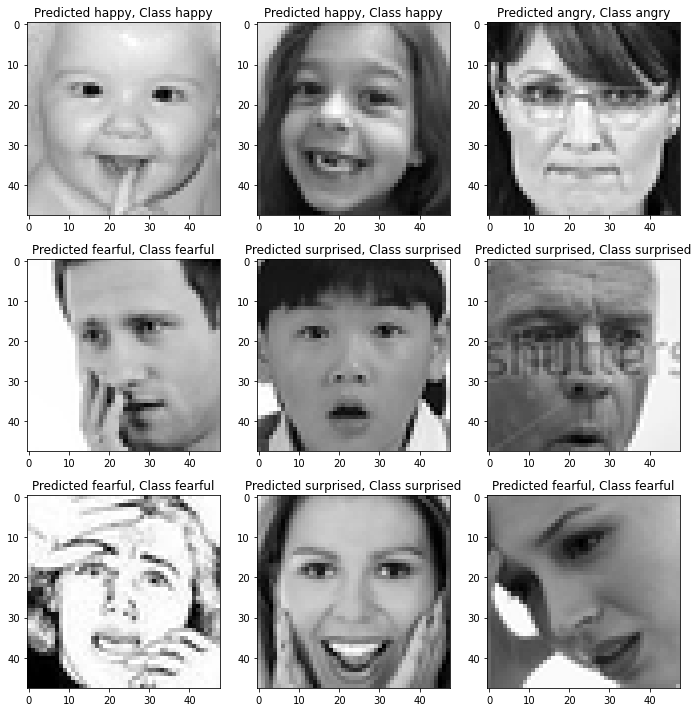

In [39]:
correct = np.where(predicted_classes==test_y)[0]
plt.figure(figsize=(10,10))
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(key_list[val_list.index(predicted_classes[correct])],key_list[val_list.index(test_y[correct])] ))
    plt.tight_layout()

Found 1966 incorrect labels


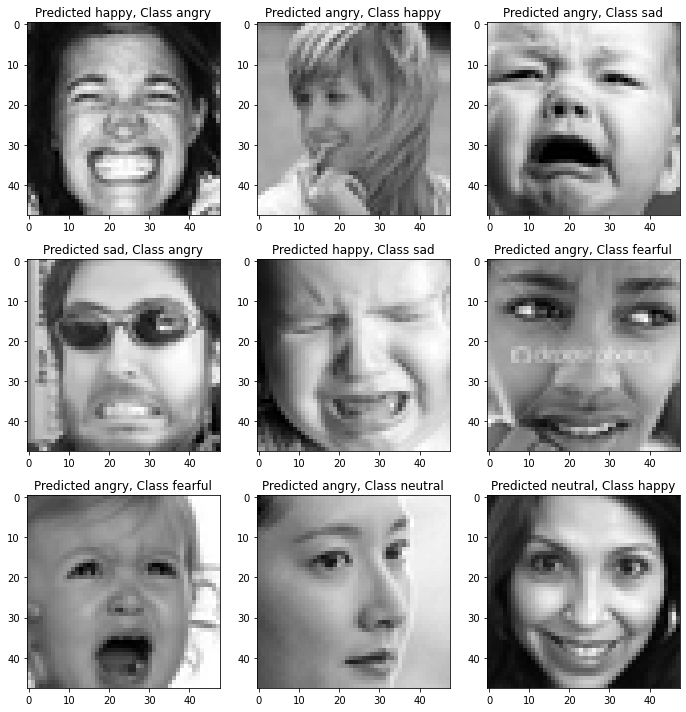

In [37]:
incorrect = np.where(predicted_classes!=test_y)[0]
plt.figure(figsize=(10,10))
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect] ,cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(key_list[val_list.index(predicted_classes[incorrect])],key_list[val_list.index(test_y[incorrect])] ))
    plt.tight_layout()